In [1]:
cd ../jecs

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs


In [2]:
import torch
if torch.cuda.is_available():
  print('Numero di GPU disponibili: ',torch.cuda.device_count())
  for i in range(0,torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

# se la GPU è disponibile setto device='cuda', altrimenti 'cpu
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

Computation device: cpu



In [7]:
def foo():
    yield 1
    print('foo')
    yield 2
    print('foo')
    yield 3

In [10]:
for i in foo():
    print(str(i)+"im here!")

1im here!
foo
2im here!
foo
3im here!


In [11]:
from dataset import JetEnergyCorrectionDataset, load_energy_flow, load_root_files 

fp='../test_files/00BF1FDD-65BC-E311-A63F-00259073E3D0_poet.root'

pts2, etas2, area2, npvs2, gen_pts2, jecs2 = list(load_root_files([fp]))[0]
mask = pts2 > 375
pts2 = pts2[mask]
etas2 = etas2[mask]
area2 = area2[mask]
npvs2 = npvs2[mask]
gen_pts2 = gen_pts2[mask]
jecs2 = jecs2[mask]


In [17]:
pts2

array([513.2901 , 467.62134, 376.14896, 588.1106 , 458.53036, 429.87628,
       376.8599 , 637.0216 , 503.31882, 502.9872 , 414.9934 , 388.6349 ,
       384.1451 , 451.3839 , 382.30984, 391.2552 , 470.25613, 403.58676,
       479.92496, 436.12918, 377.96207, 380.4393 , 435.0979 , 445.90295,
       388.9107 , 524.3087 , 416.90466, 444.08746, 388.5151 , 523.32416,
       489.10095, 416.52557, 698.3761 , 506.8922 , 388.65588],
      dtype=float32)

In [13]:
jec_dataset2 = JetEnergyCorrectionDataset(pts2, etas2, area2, npvs2, gen_pts2, jecs2)

In [24]:
# Load the dataset


pts, etas, area, npvs, gen_pts, jecs = load_energy_flow()
pts.extend(pts2)
etas.extend(etas2)
area.extend(area2)
npvs.extend(npvs2)
gen_pts.extend(gen_pts2)
jecs.extend(jecs2)

jec_dataset = JetEnergyCorrectionDataset(pts, etas, area, npvs, gen_pts, jecs)

Test MSE: 0.47762531042099


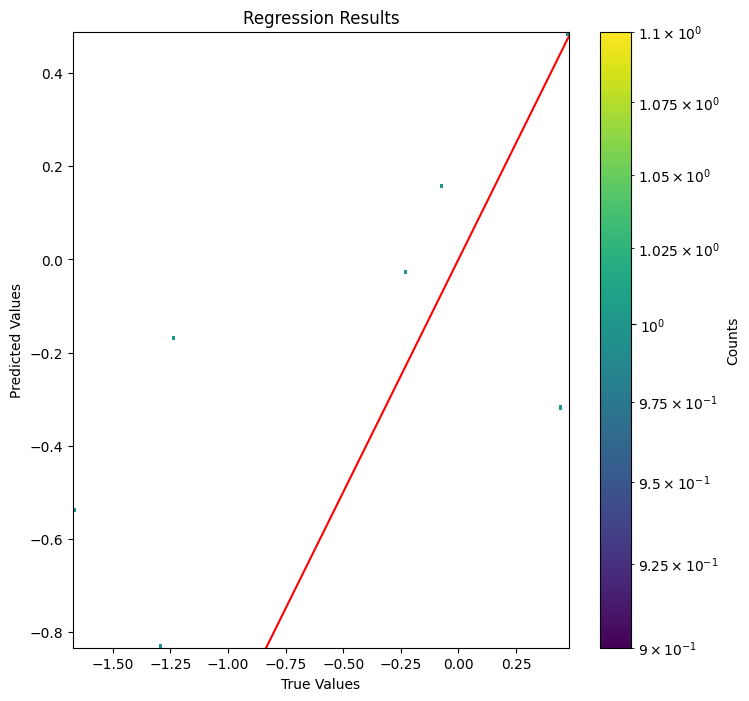

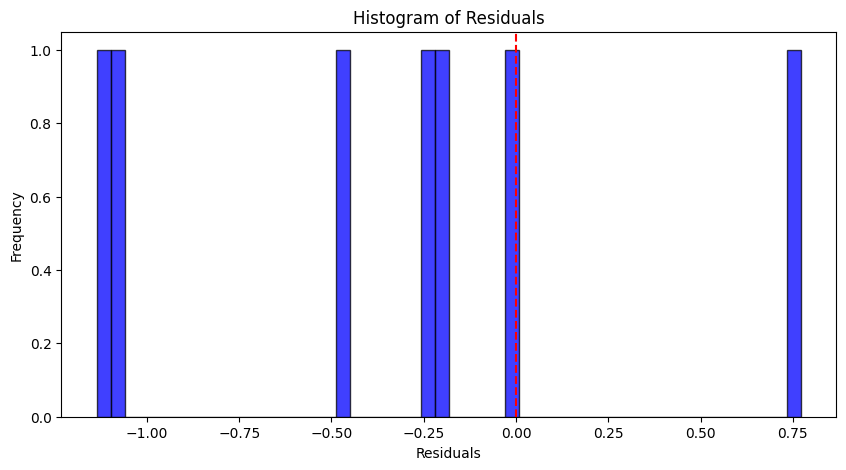

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:57: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="red", label="raw")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:59: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="purple", label="corrected")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:61: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_pred / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="orange", label="corrected predicted")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:67: RuntimeWarning: divide by zero encountered in divide
  h2 = ax[1].hist2d(pts_bin * jec_bin / gen_pts_bin, etas_bin,
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:70: RuntimeWarning: divide by zero

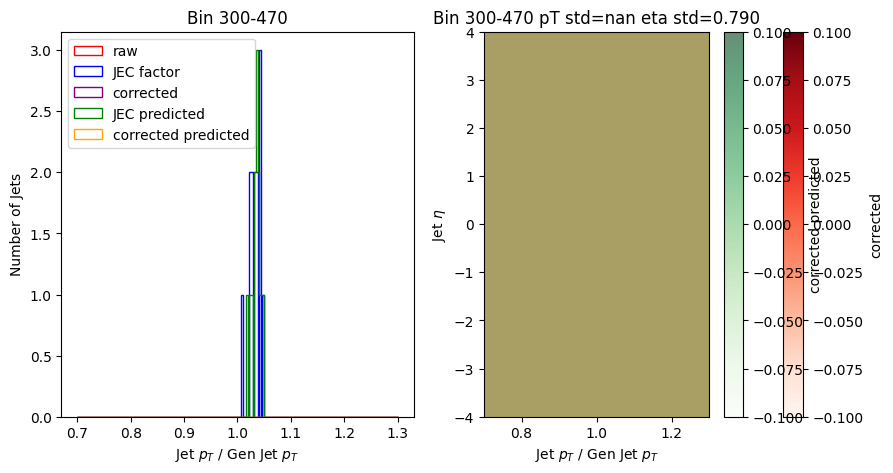

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:57: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="red", label="raw")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:59: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="purple", label="corrected")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:61: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_pred / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="orange", label="corrected predicted")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:67: RuntimeWarning: divide by zero encountered in divide
  h2 = ax[1].hist2d(pts_bin * jec_bin / gen_pts_bin, etas_bin,
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:70: RuntimeWarning: divide by zero

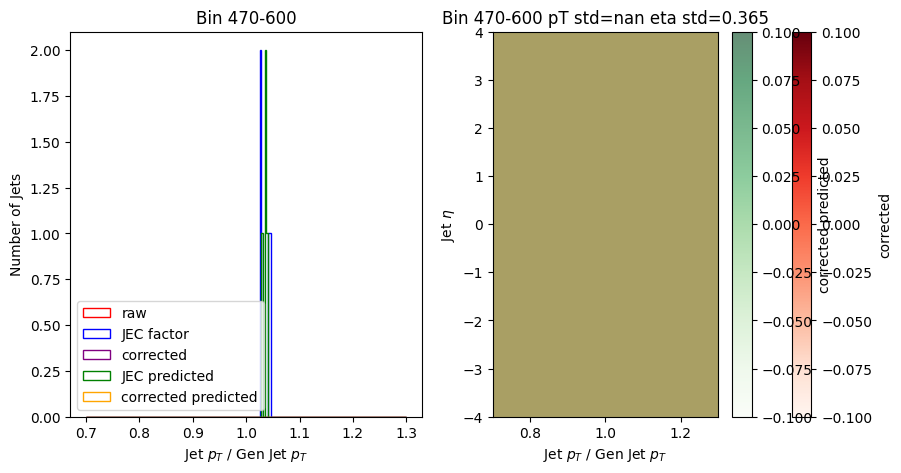

/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:57: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="red", label="raw")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:59: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_bin / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="purple", label="corrected")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:61: RuntimeWarning: divide by zero encountered in divide
  ax[0].hist(pts_bin * jec_pred / gen_pts_bin, bins=np.linspace(0.7, 1.3, 200), histtype="step", color="orange", label="corrected predicted")
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:67: RuntimeWarning: divide by zero encountered in divide
  h2 = ax[1].hist2d(pts_bin * jec_bin / gen_pts_bin, etas_bin,
/Users/barakmargalit/Desktop/codewars/ExpPro/jecs/eval.py:70: RuntimeWarning: divide by zero

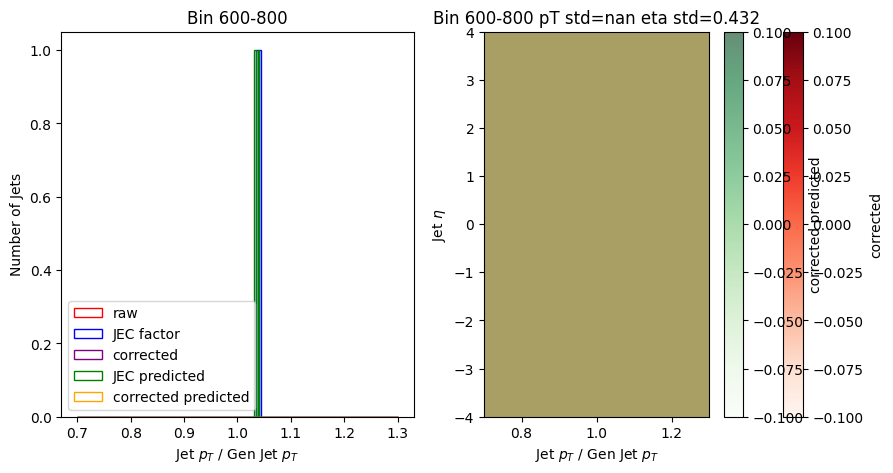

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [16]:
import importlib
import eval
from j_model import ShallowMLP

importlib.reload(eval)
eval.run(jec_dataset2)